In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import itertools
import warnings
warnings.simplefilter("ignore")


In [2]:
df= pd.read_csv('c:/python/SINO_Provinces.csv',sep=';',decimal=',')
df.head()

,Criteria,Province,1970,1971,1972,1973,1974,1975,1976,1977,...,2021,2022,2023,2024,2025,2026,2027,2028,2029,2030
0,Highway density,Beijing,17.636905,17.994048,18.708333,19.202381,20.136905,34.535714,37.750000,39.851190,...,135.688095,136.541071,137.394048,138.247024,139.100000,139.952976,140.805952,141.658929,142.511905,143.364881
1,Highway density,Tianjin,28.270758,28.632345,28.993932,29.355519,29.717106,30.078693,30.440280,30.801867,...,164.431858,167.523009,170.614159,173.705310,176.796460,179.887611,182.978761,186.069911,189.161062,192.252212
2,Highway density,Hebei,16.965370,17.805008,19.057006,18.384656,18.595099,18.962706,19.412360,20.229622,...,121.851785,125.652051,129.452317,133.252584,137.052850,140.853117,144.653383,148.453649,152.253916,156.054182
3,Highway density,Shanxi,17.986564,17.776711,17.900832,18.115803,18.399872,18.737684,19.225208,19.696097,...,96.389635,97.347345,98.305054,99.262764,100.220473,101.178183,102.135893,103.093602,104.051312,105.009021
4,Highway density,Inner Mongolia,2.333474,2.650465,2.931192,2.455030,2.561961,2.651057,2.824514,3.082925,...,16.711107,17.025241,17.339374,17.653508,17.967642,18.281775,18.595909,18.910042,19.224176,19.538309


In [3]:
Criteria=list(df[['Criteria']].groupby('Criteria').size().index)
Provinces=list(df[['Province']].groupby('Province').size().index)
Years=list(df.columns[2:])
Years2018=list(map(lambda x: str(x),range(1970,2019)))
abbr_Cr=['GA','DW','Dis','EPC','EPG','EPO','EC','GDP','HD','HL','MA','P','PWA','RL','RPWA','RWA','TIEPC','WW','WC','UR','Wet_A','WA','Wood_A','LA','WAP','CG']


In [4]:
df1=df[['Criteria','Province']]
for el in Years2018:
    df1[el]=df[el]/df['1970']
df1.head()

,Criteria,Province,1970,1971,1972,1973,1974,1975,1976,1977,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,Highway density,Beijing,1.0,1.020250,1.060749,1.088761,1.141748,1.958151,2.140398,2.259534,...,7.004725,7.125886,7.204522,7.253459,7.314546,7.373945,7.386095,7.451603,7.499966,7.548329
1,Highway density,Tianjin,1.0,1.012790,1.025580,1.038370,1.051161,1.063951,1.076741,1.089531,...,4.481318,4.642841,4.746454,4.817824,4.920185,5.042892,5.180624,5.269618,5.378959,5.488300
2,Highway density,Hebei,1.0,1.049491,1.123289,1.083658,1.096062,1.117730,1.144234,1.192407,...,4.777509,4.846879,4.929186,5.120117,5.479588,5.627434,5.795534,6.062376,6.286377,6.510379
3,Highway density,Shanxi,1.0,0.988333,0.995234,1.007185,1.022979,1.041760,1.068865,1.095045,...,4.529221,4.682673,4.795219,4.900615,4.959770,4.995411,5.014050,5.092751,5.145997,5.199242
4,Highway density,Inner Mongolia,1.0,1.135845,1.256149,1.052092,1.097917,1.136099,1.210433,1.321174,...,5.461185,5.723383,5.832096,5.932367,6.068285,6.236805,6.352980,6.488368,6.622989,6.757609


In [5]:
Province1='Tibet'
Province2='Shandong'

In [6]:
Delta_Tibet=[]
for el in Criteria:
    par1=np.array(df1[(df1.Criteria==el)&(df1.Province==Province1)][df1.columns[2:]])[0]
    for prov in Provinces:
        par2=np.array(df1[(df1.Criteria==el)&(df1.Province==prov)][df1.columns[2:]])[0]
        Delta_Tibet.append([el]+[prov]+list(np.abs(par1-par2)))
df3=pd.DataFrame(Delta_Tibet,columns=df1.columns)

In [7]:
Delta_Shandong=[]
for el in Criteria:
    par1=np.array(df1[(df1.Criteria==el)&(df1.Province==Province2)][df1.columns[2:]])[0]
    for prov in Provinces:
        par2=np.array(df1[(df1.Criteria==el)&(df1.Province==prov)][df1.columns[2:]])[0]
        Delta_Shandong.append([el]+[prov]+list(np.abs(par1-par2)))
df4=pd.DataFrame(Delta_Shandong,columns=df1.columns)

In [8]:
ro=0.5
df5=pd.DataFrame(Provinces,columns=['Province'])
for num,el in enumerate(Criteria):
    if abbr_Cr[num]!='LA':
        maxmax=np.max(np.array(df3[df3.Criteria==el][df3.columns[2:]]))
        minmin=np.min(np.array(df3[df3.Criteria==el][df3.columns[2:]]))
        df5[abbr_Cr[num]]=np.mean((minmin+ro*maxmax)/(np.array(df3[(df3.Criteria==el)][df3.columns[2:]])+ro*maxmax),axis=1)
df5.head()

,Province,GA,DW,Dis,EPC,EPG,EPO,EC,GDP,HD,...,RWA,TIEPC,WW,WC,UR,Wet_A,WA,Wood_A,WAP,CG
0,Anhui,0.999534,0.996786,NaN,NaN,NaN,NaN,0.814835,0.916017,0.995169,...,0.998792,0.978792,0.854488,0.854765,0.923029,0.895381,0.998792,0.682653,0.750104,0.895094
1,Beijing,0.999990,0.998814,NaN,NaN,NaN,NaN,0.833610,0.958531,0.994575,...,0.643236,0.992531,0.871309,0.863008,0.785561,0.746883,0.643236,0.658400,0.819891,0.939112
2,Chongqing,0.999422,0.998989,NaN,NaN,NaN,NaN,0.917839,0.845917,0.979628,...,0.991210,0.987440,0.843681,0.919572,0.922995,0.775679,0.991210,0.675907,0.567141,0.946930
3,Fujian,0.999288,0.994697,NaN,NaN,NaN,NaN,0.761194,0.776228,0.998038,...,0.999674,0.995417,0.931239,0.877715,0.880345,0.800497,0.999674,0.641709,0.855819,0.809443
4,Gansu,0.999967,0.992092,NaN,NaN,NaN,NaN,0.829044,0.984091,0.999079,...,0.999983,0.988312,0.877433,0.844591,0.917725,0.738245,0.999983,0.895007,0.760661,0.926960


In [9]:
ro=0.5
df6=pd.DataFrame(Provinces,columns=['Province'])
for num,el in enumerate(Criteria):
    if abbr_Cr[num]!='LA':
        maxmax=np.max(np.array(df4[df4.Criteria==el][df4.columns[2:]]))
        minmin=np.min(np.array(df4[df4.Criteria==el][df4.columns[2:]]))
        df6[abbr_Cr[num]]=np.mean((minmin+ro*maxmax)/(np.array(df4[(df4.Criteria==el)][df4.columns[2:]])+ro*maxmax),axis=1)
df6.head()

,Province,GA,DW,Dis,EPC,EPG,EPO,EC,GDP,HD,...,RWA,TIEPC,WW,WC,UR,Wet_A,WA,Wood_A,WAP,CG
0,Anhui,0.999413,0.980282,NaN,NaN,NaN,NaN,0.888119,0.836709,0.998264,...,0.998804,0.971158,0.927314,0.822102,0.947230,0.838472,0.998804,0.894409,0.728290,0.945217
1,Beijing,0.998937,0.980937,NaN,NaN,NaN,NaN,0.842505,0.823072,0.995894,...,0.642529,0.989823,0.859129,0.962639,0.786079,0.742490,0.642529,0.740163,0.646435,0.909668
2,Chongqing,0.998371,0.979711,NaN,NaN,NaN,NaN,0.767100,0.929690,0.982381,...,0.992081,0.980271,0.835457,0.872082,0.964117,0.847329,0.992082,0.840010,0.749393,0.900856
3,Fujian,0.999659,0.984050,NaN,NaN,NaN,NaN,0.873439,0.911972,0.996599,...,0.998490,0.987459,0.780927,0.939631,0.921415,0.870613,0.998490,0.658671,0.595274,0.901909
4,Gansu,0.998915,0.984958,NaN,NaN,NaN,NaN,0.868168,0.800206,0.996433,...,0.998399,0.980582,0.729198,0.989361,0.917071,0.726177,0.998399,0.750657,0.699383,0.919055


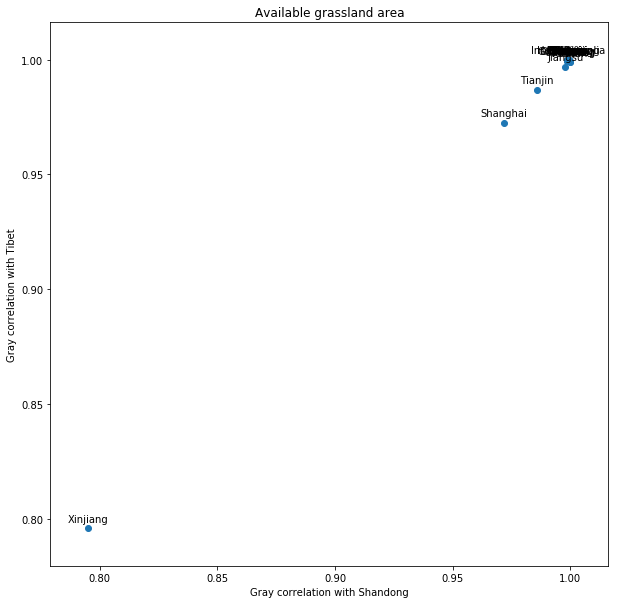

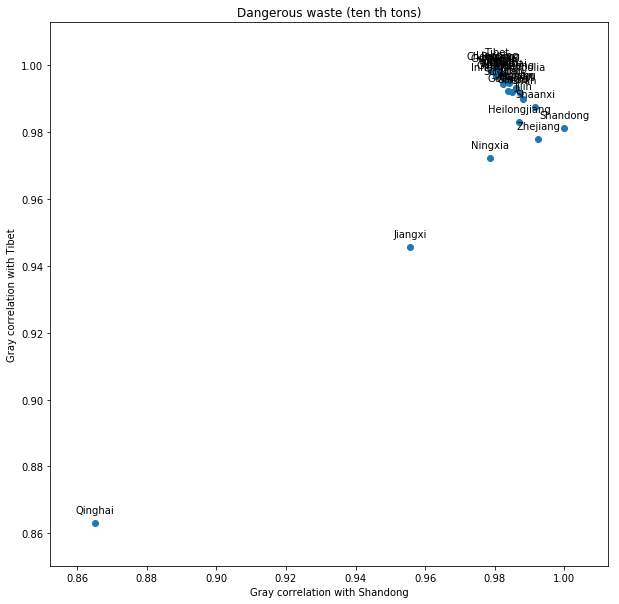

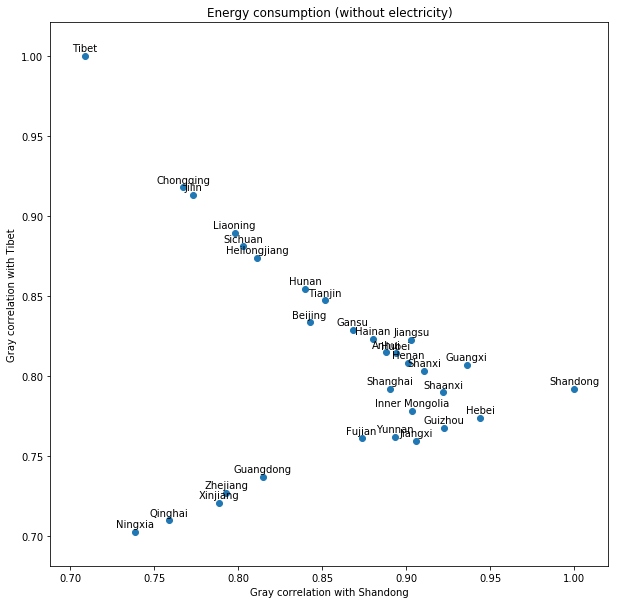

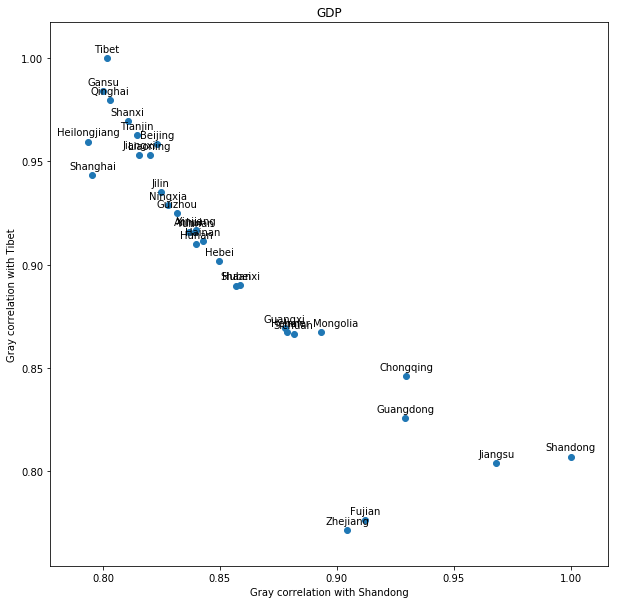

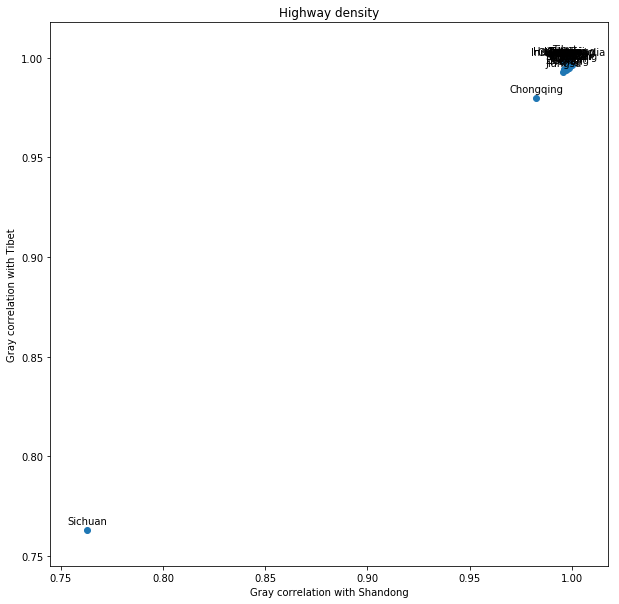

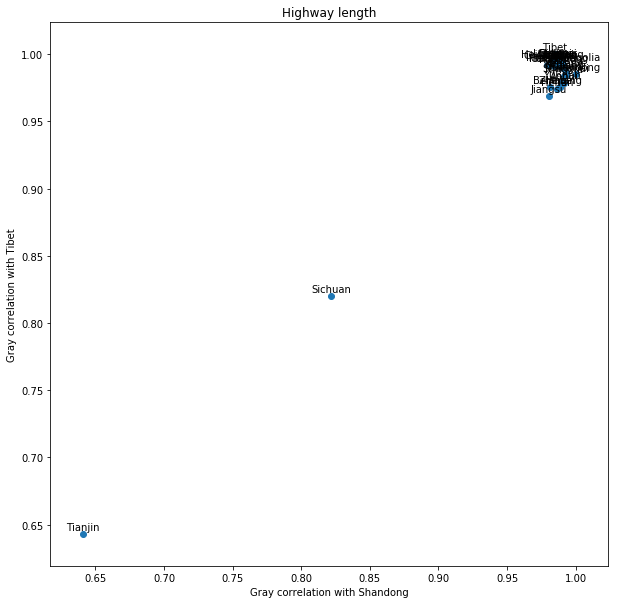

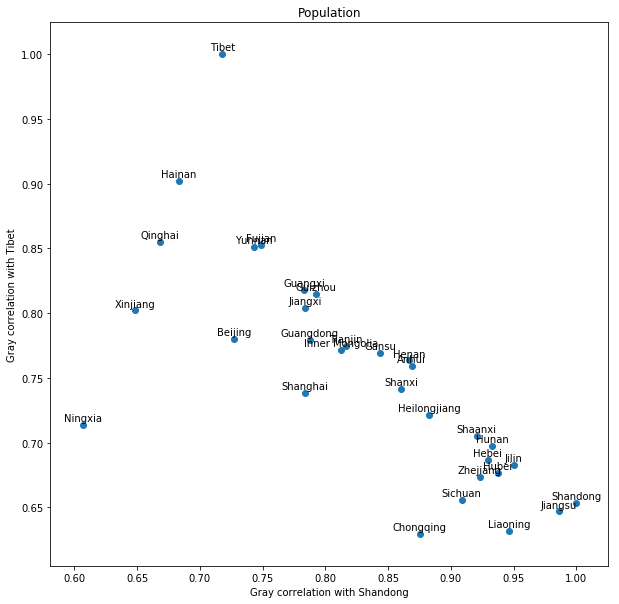

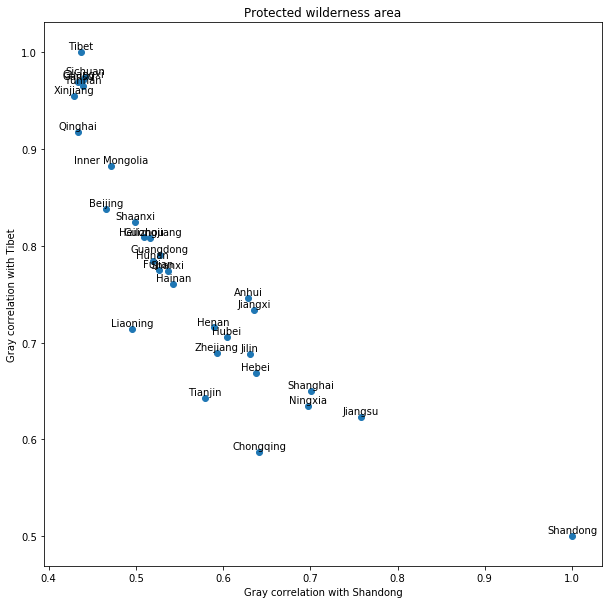

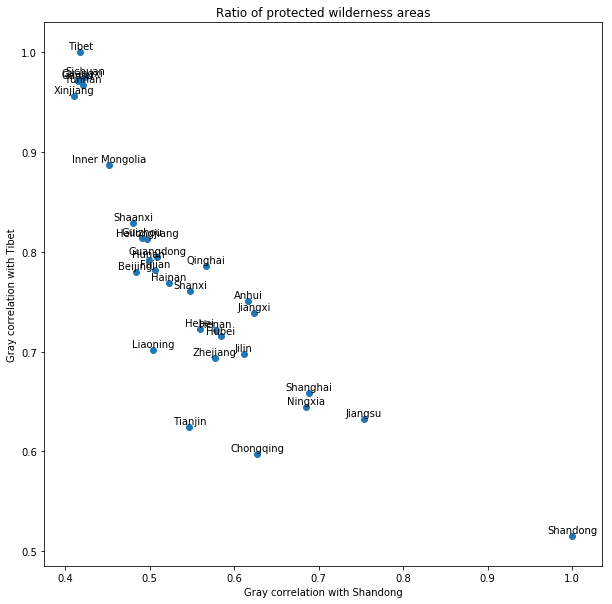

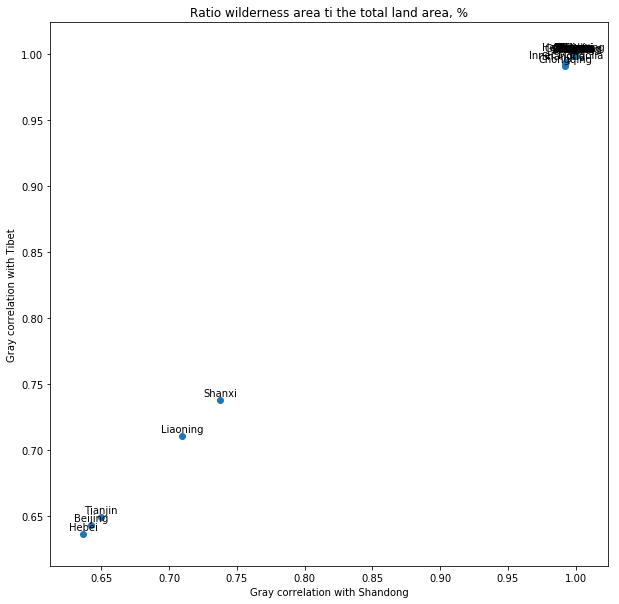

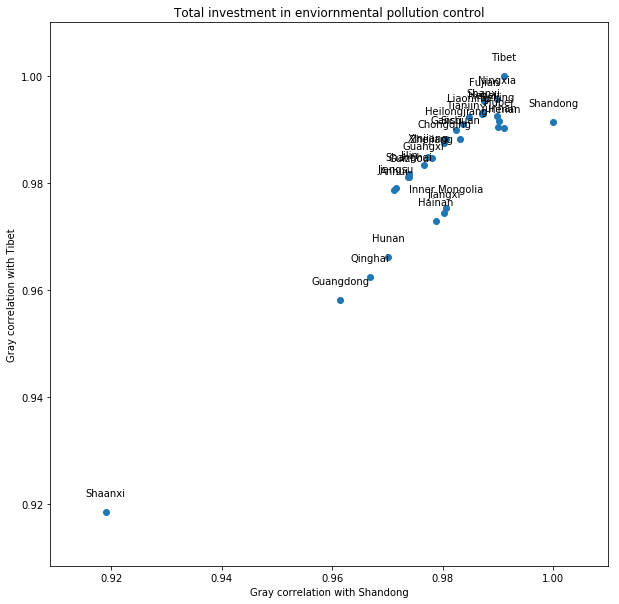

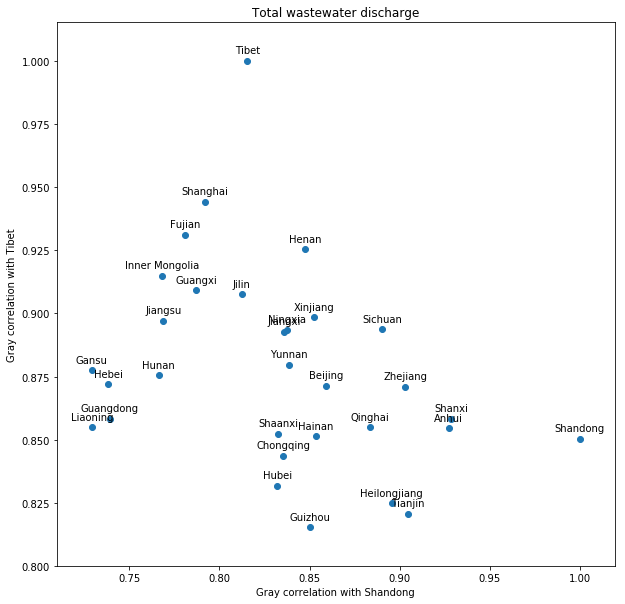

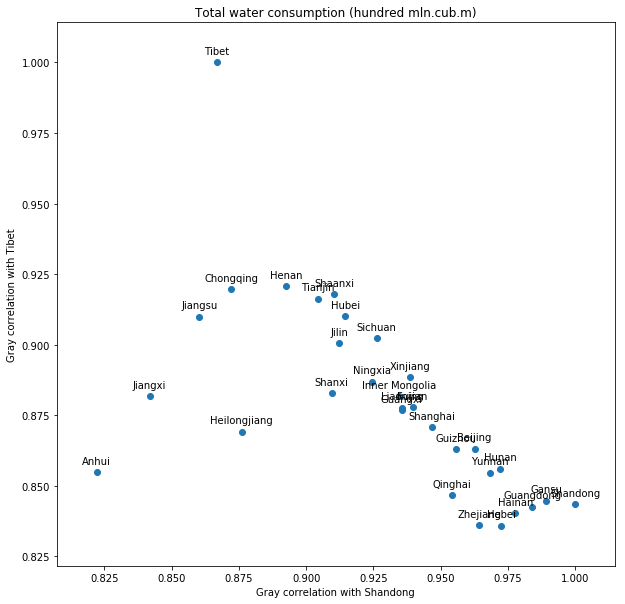

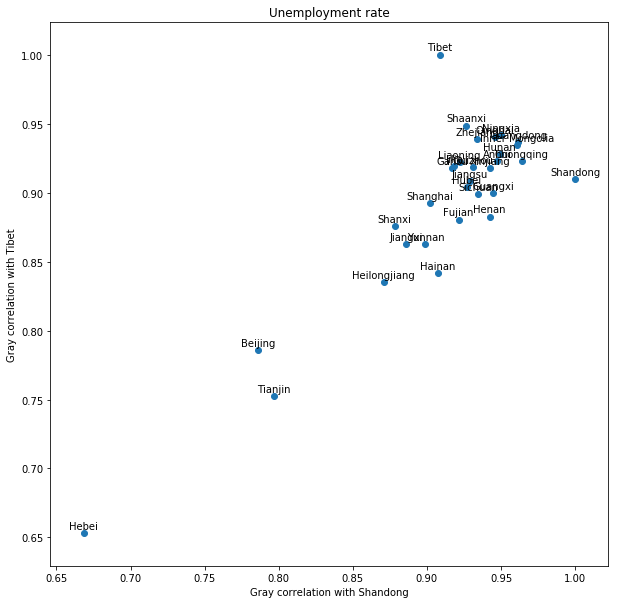

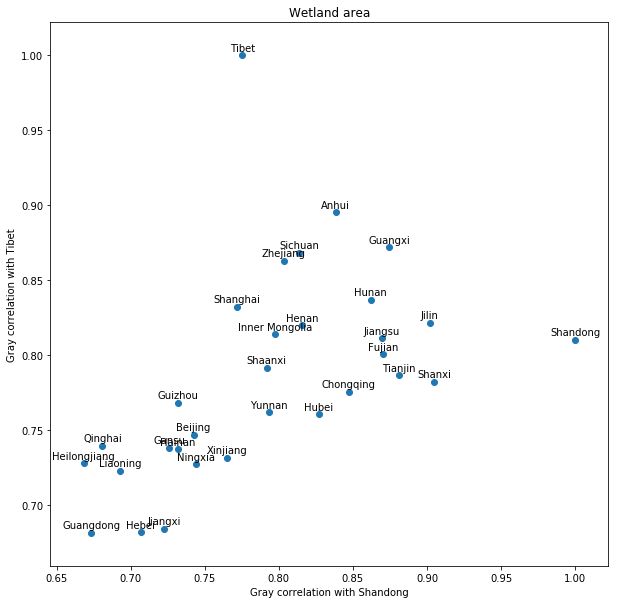

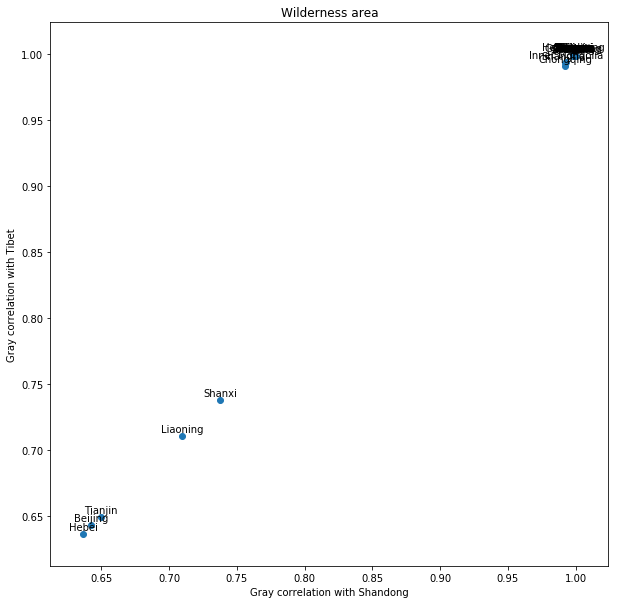

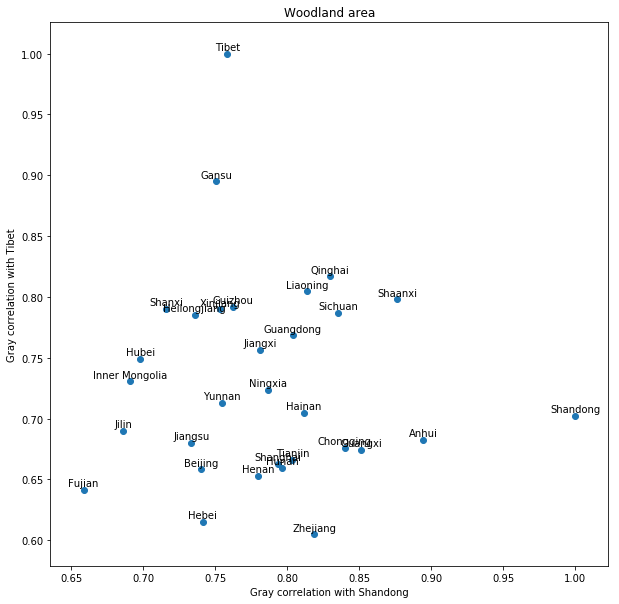

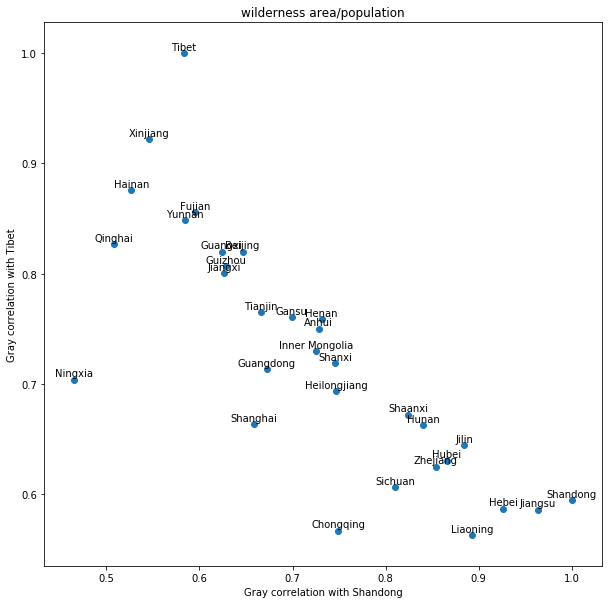

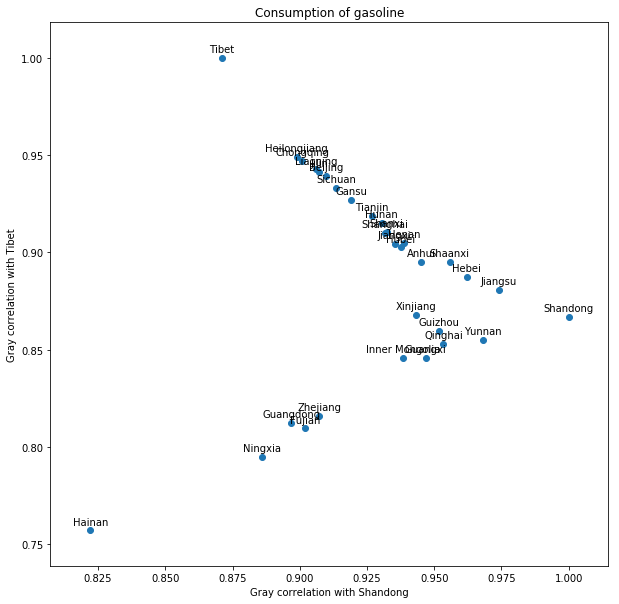

In [28]:
for num,el in enumerate(Criteria):
    if abbr_Cr[num]!='LA':
        if np.min(np.int32(np.isnan(df6[abbr_Cr[num]]) & np.isnan(df5[abbr_Cr[num]])))!=1:
            dd=((np.isnan(df6[abbr_Cr[num]]) & np.isnan(df5[abbr_Cr[num]]))==False)
            plt.figure(figsize=(10,10))
            plt.title(el)
            plt.scatter(df6[abbr_Cr[num]][dd],df5[abbr_Cr[num]][dd])
            plt.xlabel('Gray correlation with Shandong')
            plt.ylabel('Gray correlation with Tibet')
            for x in range(len(Provinces)):
                if dd[x]:
                    plt.text(df6.loc[x][abbr_Cr[num]],df5.loc[x][abbr_Cr[num]]+0.003,Provinces[x],horizontalalignment='center')
            plt.show()

Province    31
GA          31
DW          31
Dis          0
EPC          0
EPG          0
EPO          0
EC          31
GDP         31
HD          31
HL          31
MA           0
P           31
PWA         31
RL           0
RPWA        31
RWA         31
TIEPC       31
WW          31
WC          31
UR          31
Wet_A       31
WA          31
Wood_A      31
WAP         31
CG          31
dtype: int64

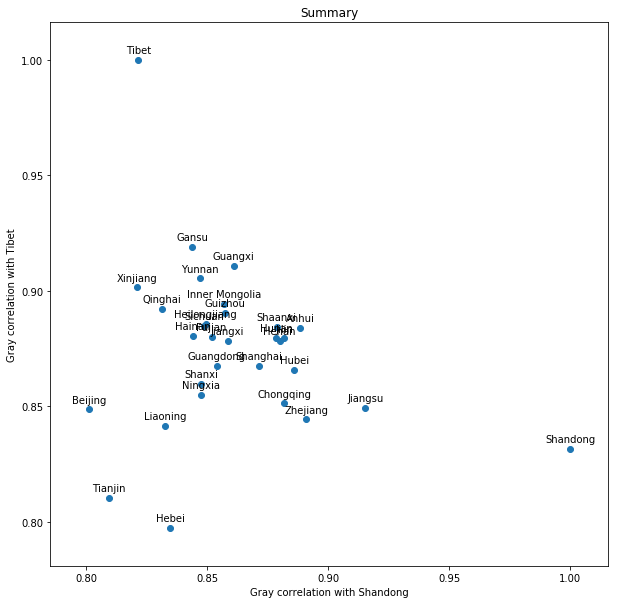

In [34]:
df7=df5[df5.columns[(df5.count()==31)&(df6.count()==31)]]
df8=df6[df5.columns[(df5.count()==31)&(df6.count()==31)]]
yyy=np.mean(np.array(df7[df7.columns[1:]]),axis=1)
xxx=np.mean(np.array(df8[df8.columns[1:]]),axis=1)
plt.figure(figsize=(10,10))
plt.title('Summary')
plt.scatter(xxx,yyy)
plt.xlabel('Gray correlation with Shandong')
plt.ylabel('Gray correlation with Tibet')
for x in range(len(Provinces)):
    plt.text(xxx[x],yyy[x]+0.003,Provinces[x],horizontalalignment='center')
plt.show()

In [53]:
df5.head()

,Province,GA,EC,GDP,HD,HL,P,PWA,RL,RPWA,RWA,TIEPC,WW,UR,Wet_A,WA,Wood_A,WAP
0,Anhui,0.999534,0.904379,0.916017,0.995169,0.978686,0.759033,0.746271,0.972791,0.751178,0.998792,0.978792,0.854488,0.923029,0.895381,0.998792,0.682653,0.750104
1,Beijing,0.999990,0.895898,0.958531,0.994575,0.975528,0.780321,0.838056,0.969621,0.779404,0.643236,0.992531,0.871309,0.785561,0.746883,0.643236,0.658400,0.819891
2,Chongqing,0.999422,0.885681,0.845917,0.979628,0.994205,0.629379,0.586901,0.812650,0.597253,0.991210,0.987440,0.843681,0.922995,0.775679,0.991210,0.675907,0.567141
3,Fujian,0.999288,0.934033,0.776228,0.998038,0.991158,0.852850,0.774552,0.974442,0.781847,0.999674,0.995417,0.931239,0.880345,0.800497,0.999674,0.641709,0.855819
4,Gansu,0.999967,0.913803,0.984091,0.999079,0.995619,0.769217,0.969046,0.972115,0.970958,0.999983,0.988312,0.877433,0.917725,0.738245,0.999983,0.895007,0.760661


PWA = PWA/WA * WA/LA * LA/(RL+HL) * (RL+HL)/GDP * GDP/EC * EC/WW * WW/TIEC * TIEC/P * P

«Доступные площади лугов»,
  'Потребление энергии',
  «Общие инвестиции в борьбу с загрязнением окружающей среды»,
  «Общий сброс сточных вод»,
  'Уровень безработицы',
  «Заболоченная территория»,
  «Лесной массив»,
  «площадь земли (км ^ 2)»,
  «Дикая местность / население»